In [7]:
import pandas as pd

dataset = pd.read_csv("../news_loader/dags/init_dataset.csv")
dataset.head()

,text,label
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1490 non-null   object
 1   label   1490 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [9]:
dataset['label'].value_counts()

label
sport            346
business         336
politics         274
entertainment    273
tech             261
Name: count, dtype: int64

In [10]:
target_category = dataset['label'].unique()
print(target_category)

['business' 'tech' 'politics' 'sport' 'entertainment']


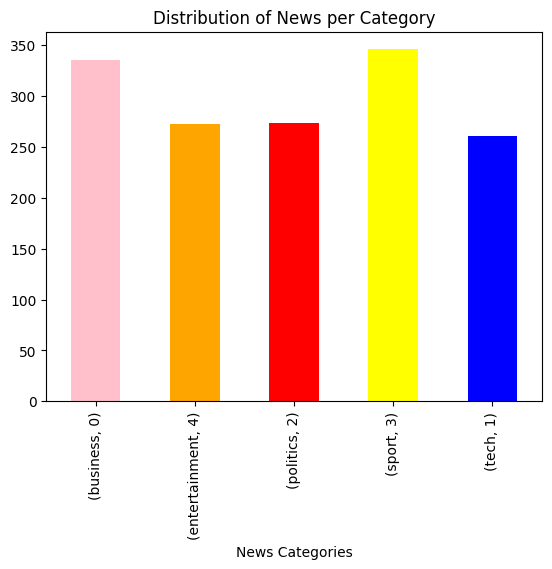

In [13]:
from matplotlib import pyplot as plt
dataset['labelId'] = dataset['label'].factorize()[0]
dataset.groupby('label').labelId.value_counts().plot(kind = "bar", color = ["pink", "orange", "red", "yellow", "blue"])
plt.xlabel("News Categories")
plt.title("Distribution of News per Category")
plt.show()

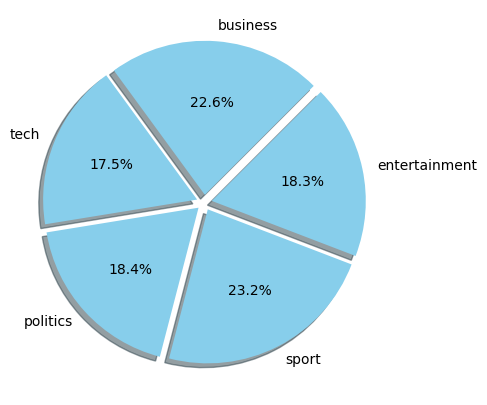

In [14]:
fig = plt.figure(figsize = (5,5))
colors = ["skyblue"]
business = dataset[dataset['labelId'] == 0 ]
tech = dataset[dataset['labelId'] == 1 ]
politics = dataset[dataset['labelId'] == 2]
sport = dataset[dataset['labelId'] == 3]
entertainment = dataset[dataset['labelId'] == 4]
count = [business['labelId'].count(), tech['labelId'].count(), politics['labelId'].count(), sport['labelId'].count(), entertainment['labelId'].count()]
pie = plt.pie(count, labels = ['business', 'tech', 'politics', 'sport', 'entertainment'],
              autopct = "%1.1f%%",
              shadow = True,
              colors = colors,
              startangle = 45,
              explode = (0.05, 0.05, 0.05, 0.05,0.05))

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading wordnet: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>
[nltk_data] Error loading punkt: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1006)>


business related words:


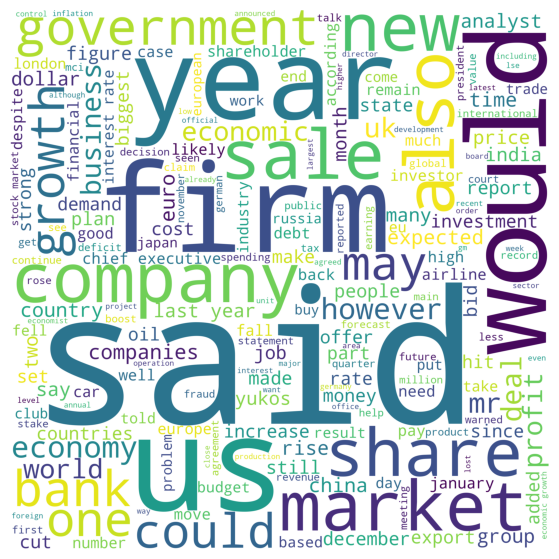

tech related words:


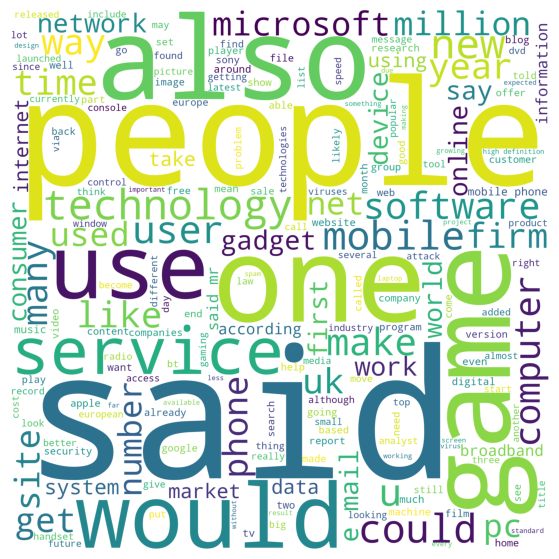

politics related words:


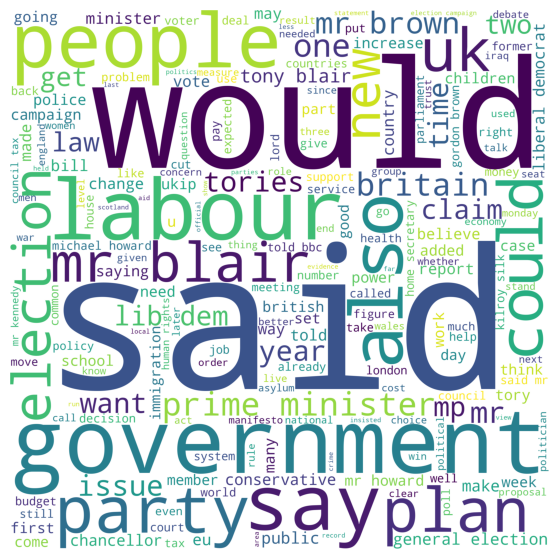

sport related words:


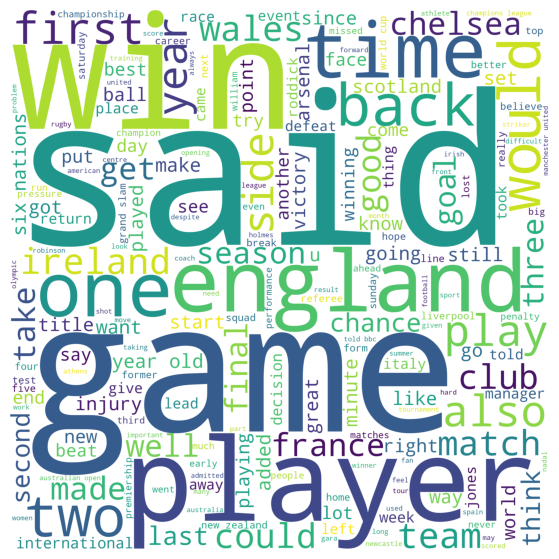

entertainment related words:


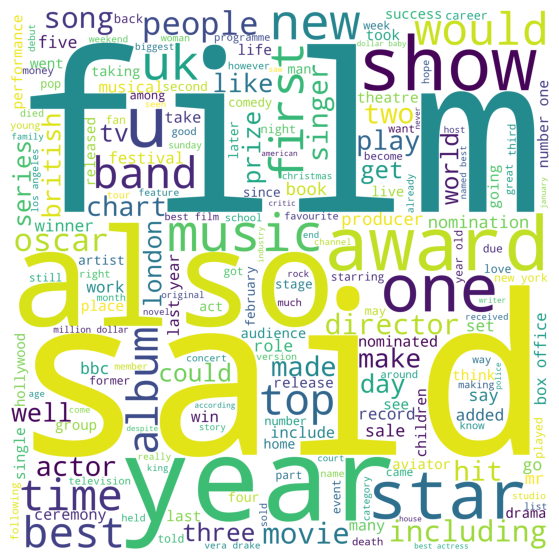

In [15]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from wordcloud import WordCloud

stop = set(stopwords.words('english'))

business = dataset[dataset['labelId'] == 0]
business = business['text']

tech = dataset[dataset['labelId'] == 1]
tech = tech['text']

politics = dataset[dataset['labelId'] == 2]
politics = politics['text']

sport = dataset[dataset['labelId'] == 3]
sport = sport['text']

entertainment = dataset[dataset['labelId'] == 4]
entertainment = entertainment['text']

def wordcloud_draw(dataset, color = 'white'):
    words = ' '.join(dataset)
    cleaned_word = ' '.join([word for word in words.split() if (word != 'news' and word != 'text')])
    wordcloud = WordCloud(stopwords = stop, background_color = color, width = 2500, height = 2500).generate(cleaned_word)

    plt.figure(1, figsize = (10,7))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

print("business related words:")
wordcloud_draw(business, 'white')

print("tech related words:")
wordcloud_draw(tech, 'white')

print("politics related words:")
wordcloud_draw(politics, 'white')

print("sport related words:")
wordcloud_draw(sport, 'white')

print("entertainment related words:")
wordcloud_draw(entertainment, 'white')